In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1.01,Very Good,E,SI2,60.0,60.0,4540,6.57,6.49,3.92
1,1,1.10,Premium,H,VS2,62.5,58.0,5729,6.59,6.54,4.10
2,2,1.50,Good,E,SI2,61.5,65.0,6300,7.21,7.17,4.42
3,3,1.53,Premium,E,SI1,61.3,59.0,12968,7.40,7.35,4.52
4,4,0.84,Fair,D,SI2,64.5,60.0,2167,5.92,5.84,3.79


In [3]:
data = data.drop(["Unnamed: 0"], axis=1)
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
data.describe()

,carat,depth,table,price,x,y,z
count,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000
mean,0.799047,61.742925,57.459010,3946.777054,5.733798,5.737574,3.539338
std,0.475214,1.428410,2.227191,3998.657385,1.123004,1.150325,0.696203
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,953.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2406.500000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5367.000000,6.540000,6.540000,4.040000
max,4.500000,79.000000,79.000000,18823.000000,10.230000,58.900000,8.060000


In [5]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.describe()

,carat,depth,table,price,x,y,z
count,43138.000000,43138.000000,43138.000000,43138.000000,43138.000000,43138.000000,43138.000000
mean,0.798795,61.743117,57.458925,3944.841764,5.734061,5.737700,3.540650
std,0.475025,1.428249,2.227093,3996.466320,1.121156,1.148875,0.692987
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,952.250000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2405.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5366.000000,6.540000,6.540000,4.040000
max,4.500000,79.000000,79.000000,18823.000000,10.230000,58.900000,8.060000


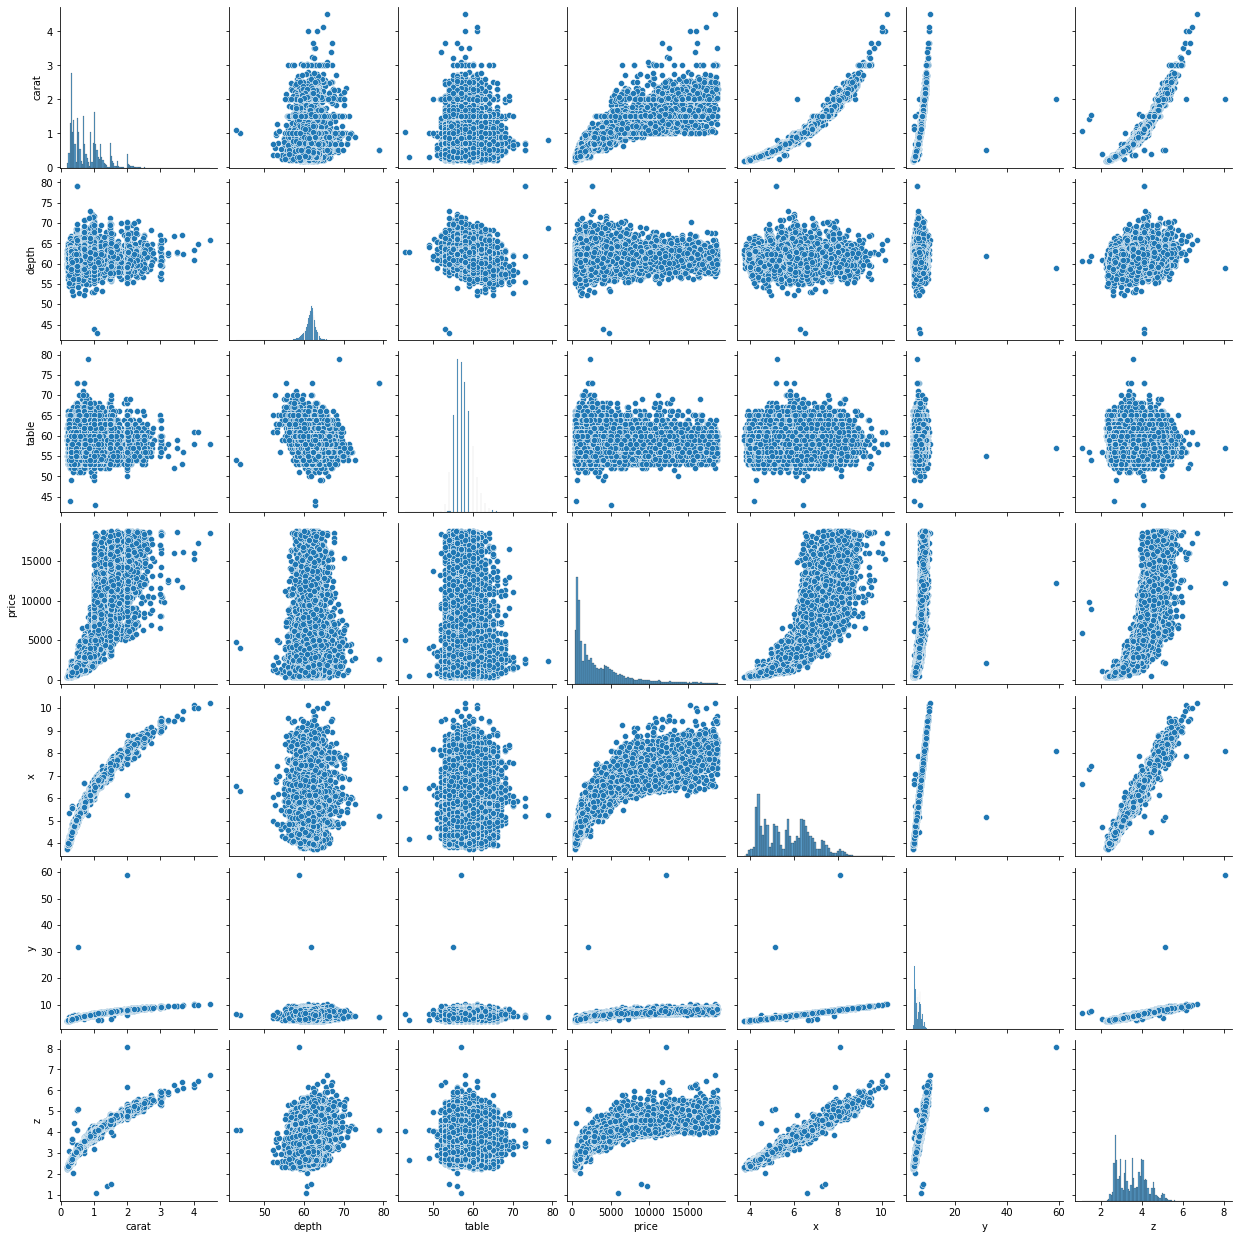

In [6]:
sb.pairplot(data)

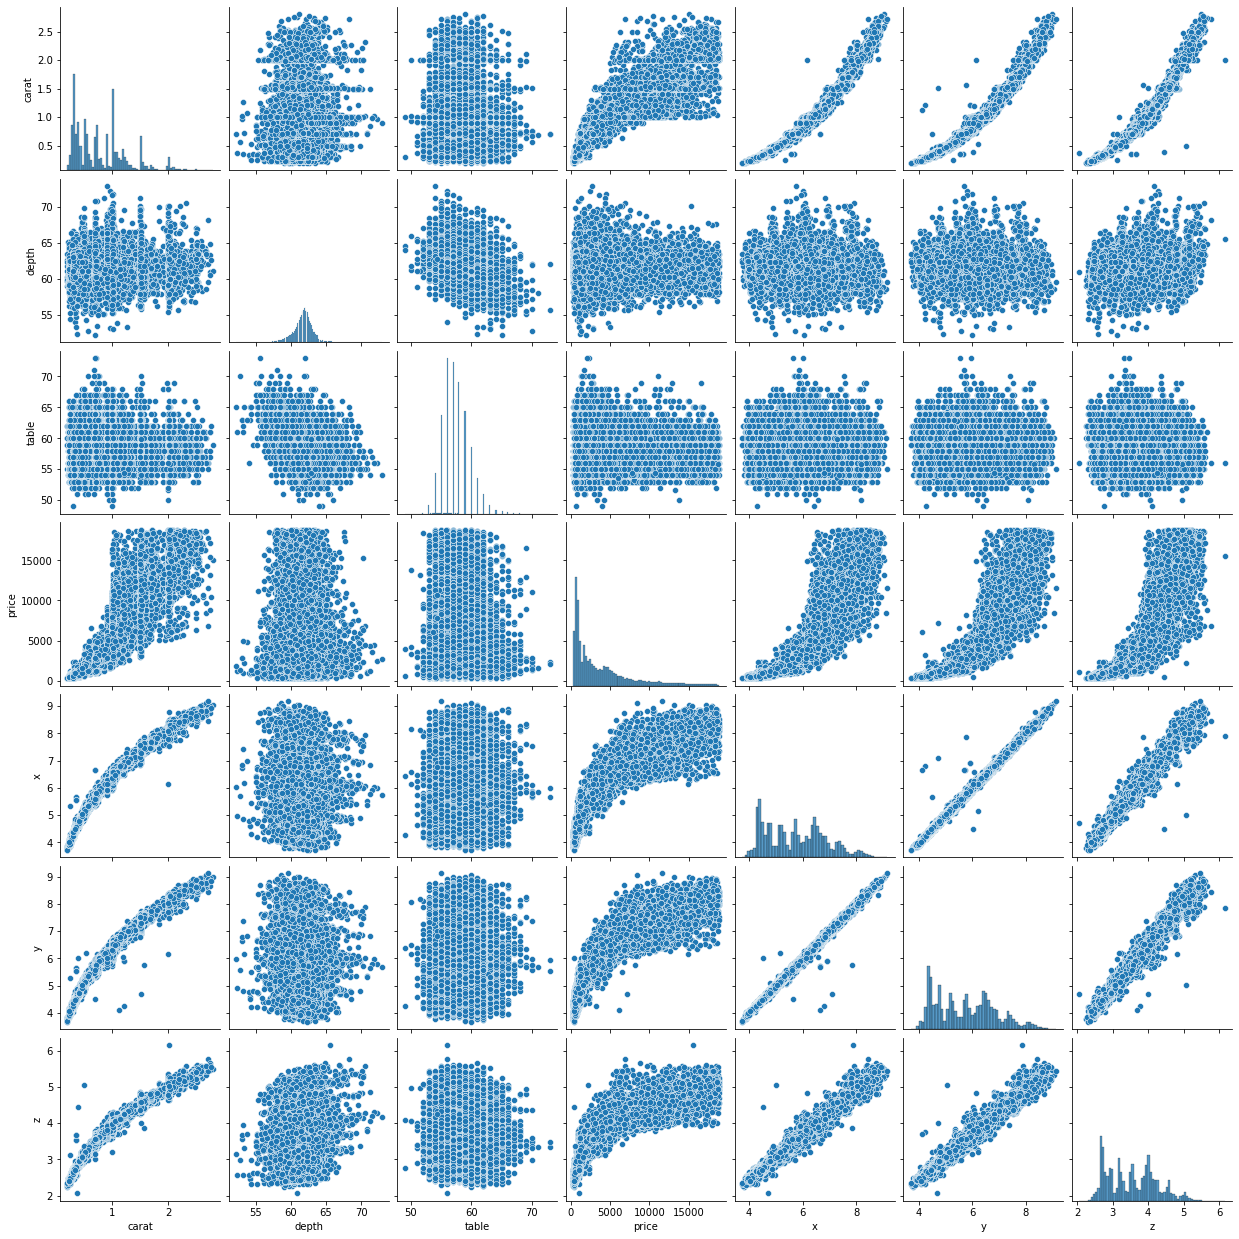

In [7]:
# Remove Outlier
data = data[(data["carat"]<3)]
data = data[(data["depth"]<75)&(data["depth"]>50)]
data = data[(data["table"]<75)&(data["table"]>45)]
data = data[(data["x"]<30)]
data = data[(data["y"]<20)]
data = data[(data["z"]<8)&(data["z"]>2)]
sb.pairplot(data)

In [8]:
data.cut.unique()
data['totdep'] = 2 * data.z/(data.y + data.x)
data.drop(['x','y','z'], axis=1, inplace=True)

data.head()
data.cut.replace({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}, inplace=True)
data.describe()

,carat,cut,depth,table,price,totdep
count,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000
mean,0.796768,3.906013,61.742415,57.457917,3936.016291,0.617445
std,0.469978,1.114488,1.415805,2.219462,3985.627082,0.014441
min,0.200000,1.000000,52.200000,49.000000,326.000000,0.438765
25%,0.400000,3.000000,61.000000,56.000000,952.000000,0.610405
50%,0.700000,4.000000,61.800000,57.000000,2401.000000,0.618357
75%,1.040000,5.000000,62.500000,59.000000,5354.500000,0.625156
max,2.800000,5.000000,72.900000,73.000000,18823.000000,1.006965


In [9]:
data.color.unique()

array(['E', 'H', 'D', 'F', 'G', 'I', 'J'], dtype=object)

In [10]:
data.color.replace({'E':6, 'I':2, 'J':1, 'H':3, 'F':5, 'G':4, 'D':7}, inplace=True)

In [11]:
data.clarity.unique()

array(['SI2', 'VS2', 'SI1', 'VVS1', 'VS1', 'VVS2', 'IF', 'I1'],
      dtype=object)

In [12]:
data.clarity.replace({'I1':1,'SI2':2, 'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}, inplace=True)

In [13]:
data.describe()

,carat,cut,color,clarity,depth,table,price,totdep
count,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000
mean,0.796768,3.906013,4.408554,4.057947,61.742415,57.457917,3936.016291,0.617445
std,0.469978,1.114488,1.701476,1.643332,1.415805,2.219462,3985.627082,0.014441
min,0.200000,1.000000,1.000000,1.000000,52.200000,49.000000,326.000000,0.438765
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,952.000000,0.610405
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,0.618357
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5354.500000,0.625156
max,2.800000,5.000000,7.000000,8.000000,72.900000,73.000000,18823.000000,1.006965


In [14]:
# Fit linear regression model
import sklearn.linear_model as sk
X = data.drop(['price'], axis=1)
Y = data['price']
import sklearn.ensemble as se
rf = se.RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)


#modelin = sk.LinearRegression()
#modelin.fit(X,Y)
#modelin.score(X,Y)

RandomForestRegressor(random_state=42)

In [15]:
test = pd.read_csv('test.csv')
test.head()
test.describe()

,id,carat,depth,table,x,y,z
count,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000
mean,5394.000000,0.793487,61.774910,57.450218,5.720597,5.722336,3.536297
std,3114.660361,0.469100,1.449154,2.263829,1.116605,1.108576,0.742402
min,0.000000,0.200000,43.000000,51.000000,0.000000,0.000000,0.000000
25%,2697.000000,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,5394.000000,0.700000,61.900000,57.000000,5.690000,5.710000,3.520000
75%,8091.000000,1.040000,62.600000,59.000000,6.520000,6.520000,4.030000
max,10788.000000,5.010000,78.200000,95.000000,10.740000,10.540000,31.800000


In [16]:
X_test = test.drop(['id'], axis=1)
X_test['totdep'] = np.where(X_test.y + X_test.x==0,0,2*X_test.z/(X_test.x+X_test.y))
X_test.drop(['x','y','z'], axis=1, inplace=True)
X_test.cut.replace({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}, inplace=True)
X_test.color.replace({'E':6, 'I':2, 'J':1, 'H':3, 'F':5, 'G':4, 'D':7}, inplace=True)
X_test.clarity.replace({'I1':1,'SI2':2, 'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}, inplace=True)
X_test.head()

,carat,cut,color,clarity,depth,table,totdep
0,0.24,5,4,7,62.1,56.0,0.619824
1,1.21,3,5,4,62.9,54.0,0.629412
2,0.50,1,6,3,61.7,68.0,0.616601
3,0.50,5,7,2,62.8,56.0,0.628345
4,1.55,5,6,2,62.3,55.0,0.622552


In [17]:
df = pd.DataFrame({'price': rf.predict(X_test)})
df.head()

,price
0,557.850000
1,8296.480000
2,1214.965000
3,1277.685500
4,10571.504857


In [ ]:
from pathlib import Path  
filepath = Path('Desktop/Eric_test.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath) 
print('done')